# Project: Wrangling and Analyze Data

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import requests

## Data Gathering

1. Use pandas to read the csv file in the local machine

In [2]:
archive = pd.read_csv('twitter_archive_enhanced.csv')
archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', 'wb') as response:
    response.write(r.content)

In [4]:
image = pd.read_csv('image_predictions.tsv', sep = '\t')
image.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API

In [5]:
%run API_Keys.ipynb

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [7]:
tweet_ids = []
retweet_count = []
like_count = []
exceptions_count = 0

In [ ]:
from tqdm.notebook import tqdm_notebook
# tdqm_notebook() is used for checking the progress of the for loop
for i, tweet_id in tqdm_notebook(enumerate(archive.tweet_id)):
    try:
        status = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_ids.append(tweet_id)
        retweet_count.append(status.retweet_count)
        like_count.append(status.favorite_count)
    except:
        exceptions_count += 1
# time to run the API
time_taken = time.time() - start
print(f'{time_taken / 60} minutes was used for runnning the API')

0it [00:00, ?it/s]

In [9]:
# converting the dictionaries to a dataframe
tweepy = pd.DataFrame({'tweet_id': tweet_ids, 'retweet_count': retweet_count, 'like_count': like_count})
tweepy

tweet_id  retweet_count  like_count
0     892420643555336193           6971       33700
1     892177421306343426           5274       29230
2     891815181378084864           3464       21975
3     891689557279858688           7191       36793
4     891327558926688256           7719       35188
...                  ...            ...         ...
1767  668986018524233728            139         478
1768  668981893510119424            258         478
1769  668979806671884288            291         701
1770  668975677807423489            495        1151
1771  668967877119254528             18         127

[1772 rows x 3 columns]

In [10]:
tweepy.to_csv('tweepy.csv', index = False)

## Assessing Data

In [11]:
# checking a sample of the archive data
archive.sample(7)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1935  674008982932058114                    NaN                  NaN   
1290  708130923141795840                    NaN                  NaN   
497   813142292504645637                    NaN                  NaN   
828   768970937022709760                    NaN                  NaN   
518   810657578271330305                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
144   863907417377173506                    NaN                  NaN   

                      timestamp  \
1935  2015-12-07 23:33:58 +0000   
1290  2016-03-11 03:22:23 +0000   
497   2016-12-25 22:00:04 +0000   
828   2016-08-26 00:38:52 +0000   
518   2016-12-19 01:26:42 +0000   
194   2017-04-21 02:22:29 +0000   
144   2017-05-15 00:02:33 +0000   

                                                 source  \
1935  <a href="http://twitter.com/download/iphone" r...   
1290  <a href="http://twitter.com/download/iphone" r...   
497   <a href="http://twitter.com/download/iphone" r...   
828   <a href="http://twitter.com" rel="nofollow">Tw...   
518   <a href="http://twitter.com/download/iphone" r...   
194   <a href="http://twitter.com/download/iphone" r...   
144   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1935  This pup is sad bc he didn't get to be the toy...                  NaN   
1290  Please stop sending in non canines like this G...                  NaN   
497   Everybody stop what you're doing and look at t...                  NaN   
828   This is Kirby. His bowl weighs more than him. ...                  NaN   
518   This is Pavlov. His floatation device has fail...                  NaN   
194   RT @dog_rates: Meet George. He looks slightly ...         8.421635e+17   
144   This is Albus. He's quite impressive at hide a...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1935                       NaN                        NaN   
1290                       NaN                        NaN   
497                        NaN                        NaN   
828                        NaN                        NaN   
518                        NaN                        NaN   
194               4.196984e+09  2017-03-16 00:00:07 +0000   
144                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1935  https://twitter.com/dog_rates/status/674008982...                10   
1290  https://twitter.com/dog_rates/status/708130923...                11   
497   https://twitter.com/dog_rates/status/813142292...                13   
828   https://twitter.com/dog_rates/status/768970937...                12   
518   https://twitter.com/dog_rates/status/810657578...                11   
194   https://twitter.com/dog_rates/status/842163532...                12   
144   https://twitter.com/dog_rates/status/863907417...                13   

      rating_denominator    name doggo floofer pupper puppo  
1935                  10    None  None    None   None  None  
1290                  10    None  None    None   None  None  
497                   10    None  None    None   None  None  
828                   10   Kirby  None    None   None  None  
518                   10  Pavlov  None    None   None  None  
194                   10  George  None    None   None  None  
144                   10   Albus  None    None   None  None

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# checking the distribution of the dataframe
archive.describe().T

count          mean           std           min  \
tweet_id                  2356.0  7.427716e+17  6.856705e+16  6.660209e+17   
in_reply_to_status_id       78.0  7.455079e+17  7.582492e+16  6.658147e+17   
in_reply_to_user_id         78.0  2.014171e+16  1.252797e+17  1.185634e+07   
retweeted_status_id        181.0  7.720400e+17  6.236928e+16  6.661041e+17   
retweeted_status_user_id   181.0  1.241698e+16  9.599254e+16  7.832140e+05   
rating_numerator          2356.0  1.312649e+01  4.587665e+01  0.000000e+00   
rating_denominator        2356.0  1.045543e+01  6.745237e+00  0.000000e+00   

                                   25%           50%           75%  \
tweet_id                  6.783989e+17  7.196279e+17  7.993373e+17   
in_reply_to_status_id     6.757419e+17  7.038708e+17  8.257804e+17   
in_reply_to_user_id       3.086374e+08  4.196984e+09  4.196984e+09   
retweeted_status_id       7.186315e+17  7.804657e+17  8.203146e+17   
retweeted_status_user_id  4.196984e+09  4.196984e+09  4.196984e+09   
rating_numerator          1.000000e+01  1.100000e+01  1.200000e+01   
rating_denominator        1.000000e+01  1.000000e+01  1.000000e+01   

                                   max  
tweet_id                  8.924206e+17  
in_reply_to_status_id     8.862664e+17  
in_reply_to_user_id       8.405479e+17  
retweeted_status_id       8.874740e+17  
retweeted_status_user_id  7.874618e+17  
rating_numerator          1.776000e+03  
rating_denominator        1.700000e+02

In [16]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [22]:
# checking a sample of the dataframe
image.sample(7)

tweet_id                                            jpg_url  \
1699  816829038950027264    https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg   
1053  714214115368108032    https://pbs.twimg.com/media/Cell8ikWIAACCJ-.jpg   
1298  752334515931054080  https://pbs.twimg.com/ext_tw_video_thumb/75233...   
1235  746507379341139972    https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg   
206   669926384437997569    https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg   
1662  811985624773361665    https://pbs.twimg.com/media/C0TAnZIUAAAADKs.jpg   
1963  867051520902168576    https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg   

      img_num                         p1   p1_conf  p1_dog                p2  \
1699        1                 dishwasher  0.700466   False  golden_retriever   
1053        1                        pug  0.533967    True        bloodhound   
1298        1         Bedlington_terrier  0.399163    True   standard_poodle   
1235        1                 toy_poodle  0.508292    True  Lakeland_terrier   
206         1                 Pomeranian  0.984231    True          keeshond   
1662        1  Staffordshire_bullterrier  0.610573    True    French_bulldog   
1963        1                    Samoyed  0.471403    True          Pekinese   

       p2_conf  p2_dog                       p3   p3_conf  p3_dog  
1699  0.245773    True                     chow  0.039012    True  
1053  0.164826    True          German_shepherd  0.046524    True  
1298  0.086425    True  wire-haired_fox_terrier  0.075231    True  
1235  0.234458    True            affenpinscher  0.084563    True  
206   0.010231    True                 papillon  0.002219    True  
1662  0.159935    True                  doormat  0.058672   False  
1963  0.302219    True               Pomeranian  0.156606    True

In [18]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image.describe().T

count          mean           std           min           25%  \
tweet_id  2075.0  7.384514e+17  6.785203e+16  6.660209e+17  6.764835e+17   
img_num   2075.0  1.203855e+00  5.618750e-01  1.000000e+00  1.000000e+00   
p1_conf   2075.0  5.945483e-01  2.711735e-01  4.433340e-02  3.644120e-01   
p2_conf   2075.0  1.345886e-01  1.006657e-01  1.011300e-08  5.388625e-02   
p3_conf   2075.0  6.032417e-02  5.090593e-02  1.740170e-10  1.622240e-02   

                   50%           75%           max  
tweet_id  7.119988e+17  7.932034e+17  8.924206e+17  
img_num   1.000000e+00  1.000000e+00  4.000000e+00  
p1_conf   5.882300e-01  8.438550e-01  1.000000e+00  
p2_conf   1.181810e-01  1.955655e-01  4.880140e-01  
p3_conf   4.944380e-02  9.180755e-02  2.734190e-01

In [21]:
tweepy.sample(7)

tweet_id  retweet_count  like_count
1536  673686845050527744            375        1275
330   831926988323639298             34         319
1398  676776431406465024           1797        4509
690   784826020293709826           2999        9550
37    884925521741709313          14946       67038
1481  674739953134403584            326         969
1134  689275259254616065            225        1052

In [20]:
tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       1772 non-null   int64
 1   retweet_count  1772 non-null   int64
 2   like_count     1772 non-null   int64
dtypes: int64(3)
memory usage: 41.7 KB


In [23]:
tweepy.describe().T

count          mean           std           min           25%  \
tweet_id       1772.0  7.505698e+17  7.374907e+16  6.689679e+17  6.793440e+17   
retweet_count  1772.0  2.700087e+03  4.091404e+03  1.000000e+00  5.355000e+02   
like_count     1772.0  7.864375e+03  1.133242e+04  0.000000e+00  1.297250e+03   

                        50%           75%           max  
tweet_id       7.077162e+17  8.175967e+17  8.924206e+17  
retweet_count  1.335000e+03  3.207750e+03  5.144000e+04  
like_count     3.026000e+03  1.053525e+04  1.237000e+05

### Quality issues

1. remove replies and retweets

2. extract tweet source

3. Rating denominator not constant and outliers in rating numerators

4. Replace 'a' in dog name with NaN

5. Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

6. replace None Values in dog name

7. change timestamp to a datetime data type

8. change tweet id to string; like_count and retweet-count to integer

### Tidiness issues

9. extract dog stage for each tweet

10. Dog breed in multiple columns

11. merge the 3 datasets

## Cleaning Data

In [24]:
# Make copies of original pieces of data for cleaning
archive_new = archive.copy()
image_new = image.copy()
tweepy_new = tweepy.copy()

### Issue #1:

#### Define: remove replies and retweets

#### Code

In [25]:
# in_reply_to_status_id denotes the tweet is a reply while retweeted_status_id denotes that it's a retweet
archive_new = archive_new[~(archive_new.in_reply_to_status_id.notnull() | archive_new.retweeted_status_id.notnull())]

#### Test

In [26]:
# checks if there is any non-null value in the dataframe
archive_new[archive_new.in_reply_to_status_id.notnull() | archive_new.retweeted_status_id.notnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #2

#### Define: extract tweet source

In [27]:
archive_new.source = archive_new.source.str.split('>').str[-2].str[:-3]

#### Test

In [28]:
archive_new.source.sample(10)

199     Twitter for iPhone
780     Twitter for iPhone
297     Twitter for iPhone
1455    Twitter for iPhone
964     Twitter for iPhone
1953    Twitter for iPhone
1777    Twitter for iPhone
21      Twitter for iPhone
1277    Twitter for iPhone
2284    Twitter for iPhone
Name: source, dtype: object

### Issue #3:

#### Define: remove denominator ratings that are not equal to 10 and numerator ratings that are greater than 15(a bit greater than the 75th percentile)

#### Code

In [29]:
archive_new = archive_new[~((archive_new.rating_denominator != 10) | (archive_new.rating_numerator > 15))]

#### Test

In [30]:
archive_new[(archive_new.rating_denominator != 10) | (archive_new.rating_numerator > 15)]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #4

#### Define: Replace 'a' in dog name with NaN

#### Code

In [31]:
# 'a' in dog name is erroneous 
archive_new['name'].replace('a', np.nan, inplace = True)

#### Test

In [32]:
archive_new[archive_new.name == 'a']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #5

#### Define: Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Code

In [33]:
archive_new.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [34]:
archive_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #6

#### Define: Replace None values in `archive_new.name` with NaN

#### Code

In [35]:
archive_new.name.replace('None', np.nan, inplace = True)

#### Test

In [36]:
archive_new[archive_new.name == 'None']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #7

#### Define: Change `timestamp` to a datetime data type

#### Code

In [37]:
archive_new.timestamp = pd.to_datetime(archive_new.timestamp)

#### Test

In [38]:
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   int64              
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                1431 non-null   object             
 8   doggo               2075 non-null   object             
 9   floofer             2075 non-null   object             
 10  pupper              2075 non-null   object             
 11  puppo               2075 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue 9

#### Define: Extract dog stage

#### Code

In [39]:
# replacing None valuetypes with 'nil' for easy referencing
archive_new.doggo.replace('None', 'null', inplace = True)
archive_new.floofer.replace('None', 'null', inplace = True)
archive_new.pupper.replace('None', 'null', inplace = True)
archive_new.puppo.replace('None', 'null', inplace = True)

In [40]:
dog_stage =[]
doggo_list = archive_new.doggo.tolist()
floofer_list = archive_new.floofer.tolist()
pupper_list = archive_new.pupper.tolist()
puppo_list = archive_new.puppo.tolist()

In [41]:
# loops through the four dog stage columns
for i, stage in enumerate(doggo_list):
    if stage != 'null':
        dog_stage.append(doggo_list[i])
    elif floofer_list[i] != 'null':
        dog_stage.append(floofer_list[i])
    elif pupper_list[i] != 'null':
        dog_stage.append(pupper_list[i])
    elif pupper_list[i] != 'null':
        dog_stage.append(puppo_list[i])
    else:
        dog_stage.append(np.nan)

In [42]:
# creating a new column and drop the unused ones
archive_new['dog_stage'] = dog_stage
archive_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [43]:
archive_new.sample(5)

tweet_id                 timestamp              source  \
2195  668872652652679168 2015-11-23 19:24:02+00:00  Twitter for iPhone   
708   785264754247995392 2016-10-09 23:44:41+00:00  Twitter for iPhone   
1315  706681918348251136 2016-03-07 03:24:33+00:00  Twitter for iPhone   
304   836380477523124226 2017-02-28 01:00:19+00:00  Twitter for iPhone   
337   832397543355072512 2017-02-17 01:13:34+00:00  Twitter for iPhone   

                                                   text  \
2195  This is Amélie. She is a confident white colle...   
708   This is Doc. He requested to be carried around...   
1315  Say hello to Katie. She's a Mitsubishi Hufflep...   
304   This is Ava. She just blasted off. Streamline ...   
337   This is Eevee. She wants to see how you're doi...   

                                          expanded_urls  rating_numerator  \
2195  https://twitter.com/dog_rates/status/668872652...                11   
708   https://twitter.com/dog_rates/status/785264754...                12   
1315  https://twitter.com/dog_rates/status/706681918...                12   
304   https://twitter.com/dog_rates/status/836380477...                12   
337   https://twitter.com/dog_rates/status/832397543...                12   

      rating_denominator    name dog_stage  
2195                  10  Amélie       NaN  
708                   10     Doc       NaN  
1315                  10   Katie       NaN  
304                   10     Ava    pupper  
337                   10   Eevee       NaN

### Issue #10

#### Define: Extract dog breed 

In [44]:
image.sample(5)

tweet_id                                          jpg_url  \
1011  709449600415961088  https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg   
661   682429480204398592  https://pbs.twimg.com/media/CXh5_dDWQAIbU-J.jpg   
1096  720059472081784833  https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg   
1236  746726898085036033  https://pbs.twimg.com/media/ClzoJz7WYAELHSf.jpg   
1496  783391753726550016  https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg   

      img_num                  p1   p1_conf  p1_dog                  p2  \
1011        2         Maltese_dog  0.780187    True      Dandie_Dinmont   
661         1             whippet  0.594701    True   Italian_greyhound   
1096        1    Mexican_hairless  0.451852    True             redbone   
1236        1    golden_retriever  0.256505    True  Labrador_retriever   
1496        4  Norwegian_elkhound  0.877130    True               cairn   

       p2_conf  p2_dog                 p3   p3_conf  p3_dog  
1011  0.074429    True    Norfolk_terrier  0.033776    True  
661   0.314091    True   Mexican_hairless  0.037773    True  
1096  0.254884    True  Italian_greyhound  0.094818    True  
1236  0.252417    True          seat_belt  0.203163   False  
1496  0.086241    True           keeshond  0.011019    True

In [45]:
dog_breed =[]
p1_list = image_new.p1.tolist()
p2_list = image_new.p2.tolist()
p3_list = image_new.p3.tolist()

for i, breed in enumerate(image_new.p1_dog):
    if breed == True:
        dog_breed.append(p1_list[i])
    elif image_new.p2_dog[i] == True:
        dog_breed.append(p2_list[i])
    elif image_new.p3_dog[i] == True:
        dog_breed.append(p3_list[i])
    else:
        dog_breed.append('Dog breed not recognised')

In [46]:
# create new column - dog_breed
image_new['dog_breed'] = dog_breed

In [47]:
# modify the dataframe to the columns needed
image_new = image_new[['tweet_id', 'jpg_url', 'img_num', 'dog_breed']]

#### Test

In [48]:
image_new.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num               dog_breed  
0        1  Welsh_springer_spaniel  
1        1                 redbone  
2        1         German_shepherd  
3        1     Rhodesian_ridgeback  
4        1      miniature_pinscher

### Issue #11

#### Define: merge the 3 datasets

#### Code

In [49]:
# merging image_new and tweepy_new together
merge_1 = tweepy_new.merge(archive_new, on ='tweet_id', how = 'right')
merge_2 = merge_1.merge(image_new, on = 'tweet_id')

#### Test

In [50]:
merge_2.head()

tweet_id  retweet_count  like_count                 timestamp  \
0  892420643555336193         6971.0     33700.0 2017-08-01 16:23:56+00:00   
1  892177421306343426         5274.0     29230.0 2017-08-01 00:17:27+00:00   
2  891815181378084864         3464.0     21975.0 2017-07-31 00:18:03+00:00   
3  891689557279858688         7191.0     36793.0 2017-07-30 15:58:51+00:00   
4  891327558926688256         7719.0     35188.0 2017-07-29 16:00:24+00:00   

               source                                               text  \
0  Twitter for iPhone  This is Phineas. He's a mystical boy. Only eve...   
1  Twitter for iPhone  This is Tilly. She's just checking pup on you....   
2  Twitter for iPhone  This is Archie. He is a rare Norwegian Pouncin...   
3  Twitter for iPhone  This is Darla. She commenced a snooze mid meal...   
4  Twitter for iPhone  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  \
0                  10   Phineas       NaN   
1                  10     Tilly       NaN   
2                  10    Archie       NaN   
3                  10     Darla       NaN   
4                  10  Franklin       NaN   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   

                  dog_breed  
0  Dog breed not recognised  
1                 Chihuahua  
2                 Chihuahua  
3        Labrador_retriever  
4                    basset

### Issue #8

#### Define: Convert tweet_id to string; like_count and retweet_count to integer

#### Code

In [52]:
# change tweet_id to string
merge_2.tweet_id = merge_2.tweet_id.astype('str')
loop_list = ['like_count', 'retweet_count']
# loops through the int_list
for col in loop_list:
    # fillna with 0 inorder to be able to convert it integer
    merge_2[col].fillna(0, inplace = True)
    # convert the columns to integer
    merge_2[col] = merge_2[col].astype('int')

#### Test

In [53]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1949 non-null   object             
 1   retweet_count       1949 non-null   int32              
 2   like_count          1949 non-null   int32              
 3   timestamp           1949 non-null   datetime64[ns, UTC]
 4   source              1949 non-null   object             
 5   text                1949 non-null   object             
 6   expanded_urls       1949 non-null   object             
 7   rating_numerator    1949 non-null   int64              
 8   rating_denominator  1949 non-null   int64              
 9   name                1384 non-null   object             
 10  dog_stage           280 non-null    object             
 11  jpg_url             1949 non-null   object             
 12  img_num             1949 non-null 

## Storing Data

In [55]:
merge_2.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [56]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(5)

tweet_id  retweet_count  like_count                  timestamp  \
0  892420643555336193           6971       33700  2017-08-01 16:23:56+00:00   
1  892177421306343426           5274       29230  2017-08-01 00:17:27+00:00   
2  891815181378084864           3464       21975  2017-07-31 00:18:03+00:00   
3  891689557279858688           7191       36793  2017-07-30 15:58:51+00:00   
4  891327558926688256           7719       35188  2017-07-29 16:00:24+00:00   

               source                                               text  \
0  Twitter for iPhone  This is Phineas. He's a mystical boy. Only eve...   
1  Twitter for iPhone  This is Tilly. She's just checking pup on you....   
2  Twitter for iPhone  This is Archie. He is a rare Norwegian Pouncin...   
3  Twitter for iPhone  This is Darla. She commenced a snooze mid meal...   
4  Twitter for iPhone  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  \
0                  10   Phineas       NaN   
1                  10     Tilly       NaN   
2                  10    Archie       NaN   
3                  10     Darla       NaN   
4                  10  Franklin       NaN   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   

                  dog_breed  
0  Dog breed not recognised  
1                 Chihuahua  
2                 Chihuahua  
3        Labrador_retriever  
4                    basset

In [57]:
df.dog_breed.nunique()

113

In [58]:
df.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending = False)[:10]

dog_breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Irish_setter            11.750000
Gordon_setter           11.750000
Samoyed                 11.690476
Name: rating_numerator, dtype: float64

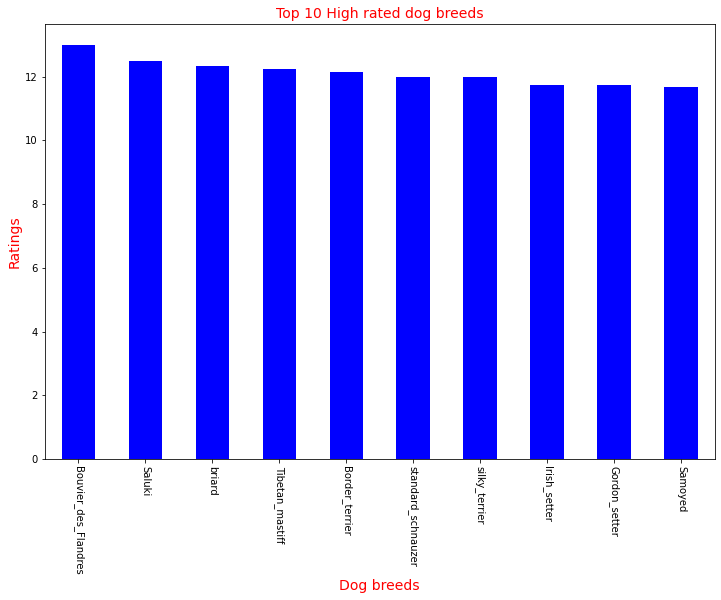

In [59]:
plt.figure(figsize = (12,8))
df.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'b')
plt.title('Top 10 High rated dog breeds', color = 'r', fontsize = 14)
plt.xlabel('Dog breeds', color = 'r', fontsize = 14)
plt.xticks(rotation = -90)
plt.ylabel('Ratings', color = 'r', fontsize = 14);

In [60]:
df.groupby('dog_breed')['rating_numerator'].mean().sort_values()[:10]

dog_breed
Japanese_spaniel               5.000000
soft-coated_wheaten_terrier    8.166667
Walker_hound                   9.000000
Scotch_terrier                 9.000000
Dog breed not recognised       9.003311
Tibetan_terrier                9.250000
Ibizan_hound                   9.250000
dalmatian                      9.333333
Boston_bull                    9.416667
Welsh_springer_spaniel         9.500000
Name: rating_numerator, dtype: float64

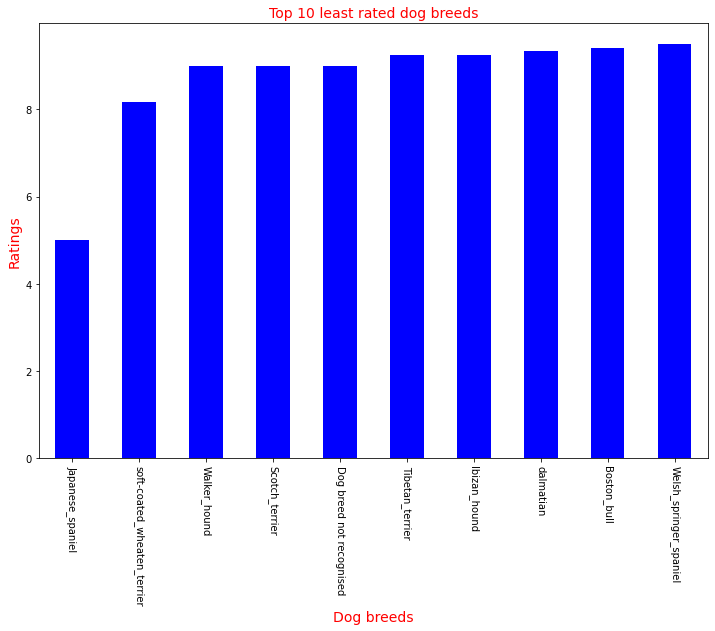

In [61]:
plt.figure(figsize = (12,8))
df.groupby('dog_breed')['rating_numerator'].mean().sort_values()[:10].plot(kind = 'bar', color = 'b')
plt.title('Top 10 least rated dog breeds', color = 'r', fontsize = 14)
plt.xlabel('Dog breeds', color = 'r', fontsize = 14)
plt.xticks(rotation = -90)
plt.ylabel('Ratings', color = 'r', fontsize = 14);

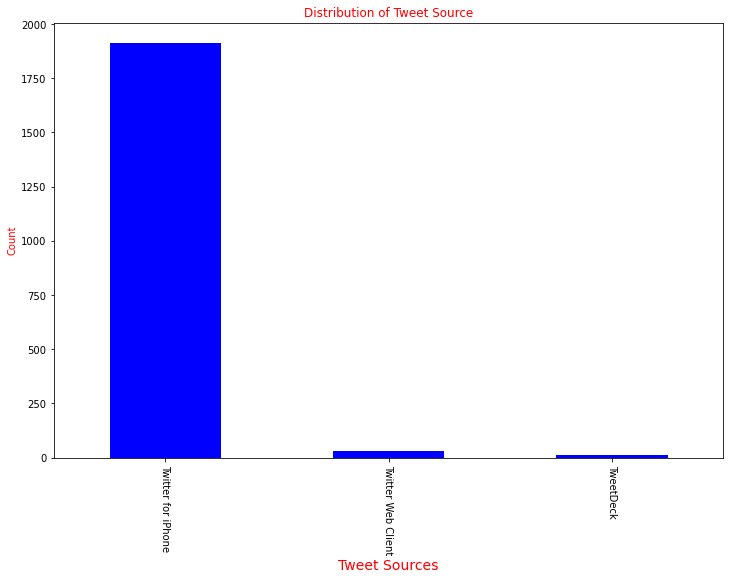

In [95]:
plt.figure(figsize = (12,8))
plt.title('Distribution of Tweet Source', color = 'r')
plt.xlabel('Tweet Sources', color = 'r', fontsize = 14)
plt.ylabel('Count', color = 'r')
df.source.value_counts().plot(kind = 'bar', color ='blue')
plt.xticks(rotation = -90);

In [86]:
df.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending = False)[:10]

dog_breed
Bedlington_terrier       6302.000000
Afghan_hound             4767.000000
English_springer         4382.500000
standard_poodle          4207.090909
Saluki                   3909.500000
cocker_spaniel           3796.633333
whippet                  3697.454545
French_bulldog           3626.967742
Bouvier_des_Flandres     3575.000000
flat-coated_retriever    3547.500000
Name: retweet_count, dtype: float64

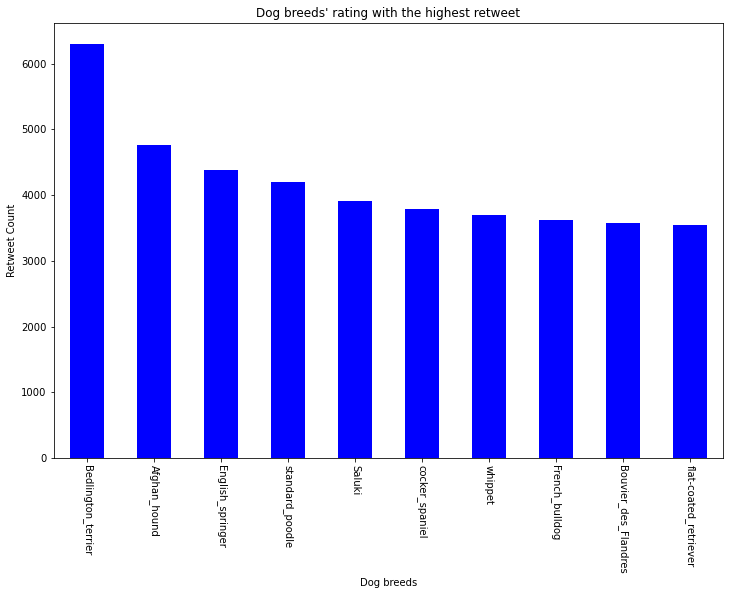

In [96]:
plt.figure(figsize = (12,8))
df.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'b')
plt.title("Dog breeds' rating with the highest retweet")
plt.xlabel('Dog breeds')
plt.xticks(rotation = -90)
plt.ylabel('Retweet Count');

In [89]:
df.groupby('dog_breed')['like_count'].mean().sort_values(ascending = False)[:10]

dog_breed
Bedlington_terrier         20200.666667
Saluki                     19995.000000
Bouvier_des_Flandres       15304.000000
French_bulldog             15246.451613
Afghan_hound               14660.333333
black-and-tan_coonhound    14577.000000
flat-coated_retriever      13994.500000
Leonberg                   12615.000000
English_springer           12100.100000
Border_terrier             11635.428571
Name: like_count, dtype: float64

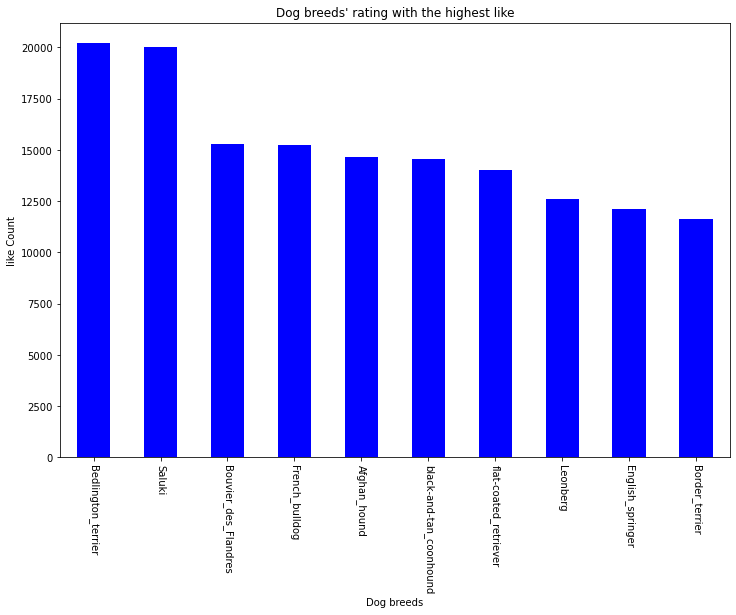

In [97]:
plt.figure(figsize = (12,8))
df.groupby('dog_breed')['like_count'].mean().sort_values(ascending = False)[:10].plot(kind = 'bar', color = 'b')
plt.title("Dog breeds' rating with the highest like")
plt.xlabel('Dog breeds')
plt.xticks(rotation = -90)
plt.ylabel('like Count');

### Insights
1. 113 dog breeds were accessed by WeRateDogs

2. Bouvier des Flandres is the top rated dog breed according to WerateDogs tweets

3. Japanese_spaniel dog breed ranks the least

4. Most of the dog rating tweets were made from Iphone

5. Bedlington terrier's ratings has the highest retweet count and favorite count